In [ ]:
# packages
import numpy as np
import xlrd # to open excel
import math
import time

# Get data

In [1]:
#open xls file
file = xlrd.open_workbook('../../../../Downloads/pop-sexe-age-quinquennal6817.xls',on_demand=True)

name = "COM_2017"
sheet = file.sheet_by_name(name)

#print(sheet.__dict__.keys())

print(sheet.ncols, sheet.nrows) # columns number, rows number

cols_labels = sheet.row(12)
#print(cols_labels)

46 38228


In [2]:
(sheet.cell(12, 0)).value, (sheet.cell(12, 1)).value

('Région \nen géographie courante', 'Département\nen géographie courante')

In [3]:
for col in range(sheet.ncols): #skipping headers of the xlsx
    #print(sheet.cell(rownum, 1)) # e.g Printing all rows value of 3rd column
    print((sheet.cell(12, col)).value)
    print(" ==== ")

Région 
en géographie courante
 ==== 
Département
en géographie courante
 ==== 
Commune
en géographie courante
 ==== 
Indicateur de stabilité de la commune
 ==== 
Département
en géographie 2019
 ==== 
Libellé de commune
 ==== 
De 0 à 4 ans
Hommes
RP2017
 ==== 
De 0 à 4 ans
Femmes
RP2017
 ==== 
De 5 à 9 ans
Hommes
RP2017
 ==== 
De 5 à 9 ans
Femmes
RP2017
 ==== 
De 10 à 14 ans
Hommes
RP2017
 ==== 
De 10 à 14 ans
Femmes
RP2017
 ==== 
De 15 à 19 ans
Hommes
RP2017
 ==== 
De 15 à 19 ans
Femmes
RP2017
 ==== 
De 20 à 24 ans
Hommes
RP2017
 ==== 
De 20 à 24 ans
Femmes
RP2017
 ==== 
De 25 à 29 ans
Hommes
RP2017
 ==== 
De 25 à 29 ans
Femmes
RP2017
 ==== 
De 30 à 34 ans
Hommes
RP2017
 ==== 
De 30 à 34 ans
Femmes
RP2017
 ==== 
De 35 à 39 ans
Hommes
RP2017
 ==== 
De 35 à 39 ans
Femmes
RP2017
 ==== 
De 40 à 44 ans
Hommes
RP2017
 ==== 
De 40 à 44 ans
Femmes
RP2017
 ==== 
De 45 à 49 ans
Hommes
RP2017
 ==== 
De 45 à 49 ans
Femmes
RP2017
 ==== 
De 50 à 54 ans
Hommes
RP2017
 ==== 
De 50 à 54 ans
Femmes
RP2

In [6]:
sheet.col_slice(colx = 5, start_rowx=14, end_rowx=16)

[text:'Abergement-Clémenciat', text:'Abergement-De-Varey']

# Data manipulation

In [7]:
numrow = 10 # 11th row, where we find age incrementation , step = 5 years old
# numrow = 11 --> here, we find sexe labels : 1 for man && 2 for women
dic = {}


# here, we want to separate the gender in the dictionary

#dic["id_comune"] = []
dic["Age"] = []
dic["Men"] = []
dic["Women"] = []
age = []

start_time = time.time()

for col in range(6,sheet.ncols):
    m = []; f = []; 

    #print(sheet.cell(numrow, col).value) 
    age.append(float(sheet.cell(10, col).value)) # do not worry, we remove duplicates at the end
        
    for i in sheet.col_slice(colx = col, start_rowx=14, end_rowx=sheet.nrows-1):
        if sheet.cell(numrow + 1, col).value == 1.0:  # women 
                
            if not i.value: # empty string ''
                m.append(0)
            else:
                m.append(i.value)  
                
        if sheet.cell(numrow + 1, col).value == 2.0:  # woman 
            if not i.value: # empty string ''
                 f.append(0)
            else:
                f.append(i.value)   
                

    # an empty m is created for women set, however, 
    # below, we ignore this empty list already created by boocle for
    # because we want to separate F  and M in the dictionary
                    
                    
    ###  =========================================   ###
    if m: # List is not empty
        dic["Men"].append(m)

    if f: # List is not empty
        dic["Women"].append(f)
    ###   =========================================   ###
    
# age list includes duplicated elements since there is a same age for man and women
###   ==================== remove duplicates elts =====================   ###
dic["Age"] = list(dict.fromkeys(age))

print("--- %s seconds ---" % (time.time() - start_time))        
    

--- 7.2803661823272705 seconds ---


In [8]:
len(dic["Age"])

20

In [123]:
dic["Women"][0][:3]

[20.14216916556245, 20.41152263374484, 0]

In [124]:
dic["Men"][0][:3]

[15.07873228599744, 5.10288065843621, 0]

# PLOTS

In [12]:
sum_men = [sum(dic["Men"][i]) for i in np.arange(len(dic["Age"]))]

sum_women = [-sum(dic["Women"][i]) for i in np.arange(len(dic["Age"]))]

In [14]:
# create age labels for the plot
yticklabels = []
for i in dic['Age'][:-1]:
    yticklabels.append(str(int(i)) + "-" + str( int(i)+4))
yticklabels.append(">=95")
yticklabels

['0-4',
 '5-9',
 '10-14',
 '15-19',
 '20-24',
 '25-29',
 '30-34',
 '35-39',
 '40-44',
 '45-49',
 '50-54',
 '55-59',
 '60-64',
 '65-69',
 '70-74',
 '75-79',
 '80-84',
 '85-89',
 '90-94',
 '>=95']

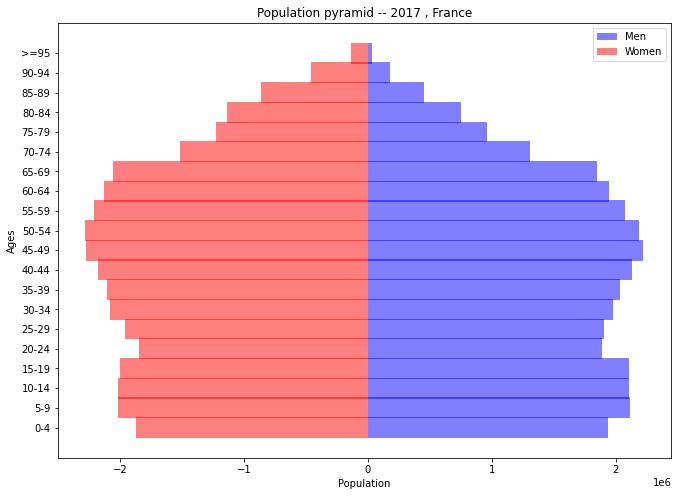

In [15]:
from matplotlib import pyplot as plt
from numpy import arange
fig, ax = plt.subplots(figsize=(11,8))
ValH = ax.barh(dic["Age"], sum_men, 5.3, label="Men",
               color='b', linewidth=0.5, align='center', alpha = 0.5)
ValF = ax.barh(dic["Age"], sum_women, 5.3, label="Women",
               color='r', linewidth=0, align='center', alpha = 0.5)
ax.set_title("Population pyramid -- 2017 , France")
ax.set_ylabel("Ages")
ax.set_xlabel("Population")
ax.legend(('Men', 'Women'));


ind = 5*np.arange(len(yticklabels))  # the x locations for the groups
ax.set_yticks(ind)
ax.set_yticklabels(yticklabels, minor=False);

In [16]:
dic["Men"][0][0], dic["Men"][1][0],  dic["Men"][2][0] 
# dic["Men"][ind1][ind2]  : ind1 : col_nb  && ind2: row_nb, such as row_nb goes from 0 to 38213

(15.07873228599744, 30.30542988473423, 20.0691279705588)

In [17]:
[(dic["Men"][i][0:2]) for i in np.arange(len(dic["Age"]))]


[[15.07873228599744, 5.10288065843621],
 [30.30542988473423, 15.308641975308632],
 [20.0691279705588, 10.20576131687242],
 [30.04830569879738, 20.41152263374484],
 [10.05275745808769, 0],
 [15.0054237872233, 5.10288065843621],
 [30.454210926582732, 10.20576131687242],
 [15.04207803661037, 20.41152263374484],
 [25.24253154001468, 5.10288065843621],
 [35.370219064601606, 5.10288065843621],
 [40.58108666379017, 0],
 [45.82941632905917, 5.10288065843621],
 [10.20099798701331, 0],
 [20.43891749822772, 15.308641975308632],
 [20.40144949780892, 10.20576131687242],
 [5.13783037487103, 5.10288065843621],
 [5.10036237445223, 10.20576131687242],
 [15.30108712335669, 5.10288065843621],
 [0, 0],
 [0, 0]]

In [18]:
def sum_list(list1, list2):
    return list1 + list2

In [22]:
y = [sum_list(dic["Men"][i], dic["Women"][i]) for i in np.arange(len(dic["Age"]))]
y_men = [dic["Men"][i] for i in np.arange(len(dic["Age"]))]
y_women = [dic["Women"][i] for i in np.arange(len(dic["Age"]))]

#20 lists inside y
res = []
for i in y:
    res = res + i
    
    
res_men = []; res_women = []
for i in y_men:
    res_men = res_men + i
for i in y_women:
    res_women = res_women + i

22


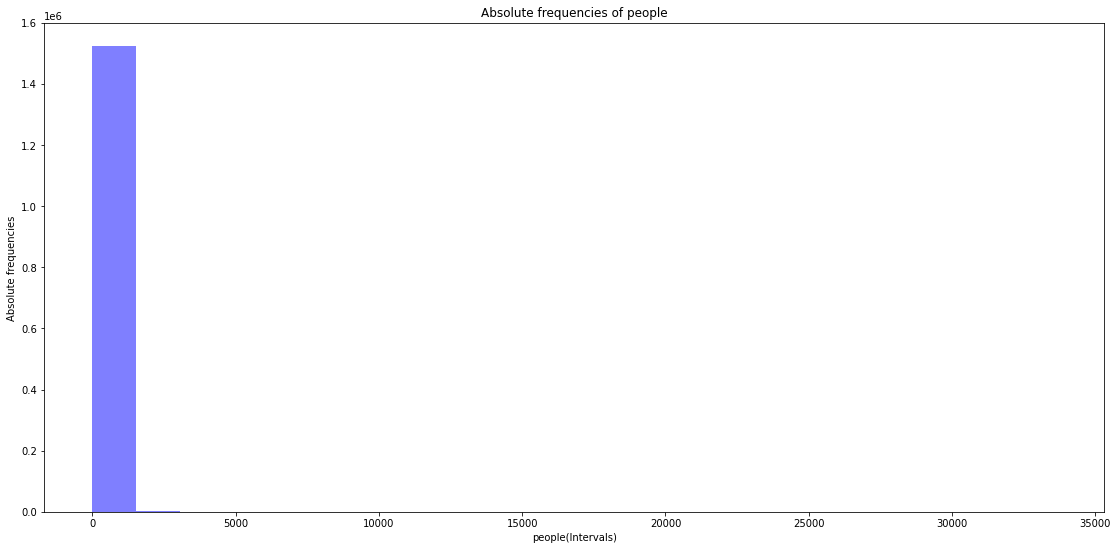

In [23]:
plt.figure(figsize = (19, 9))

length = len(res)
num_bins = round(1 + math.log2(length)) # Sturge rule
print(num_bins)

plt.hist(res, num_bins, facecolor='blue', alpha=0.5)

plt.title("Absolute frequencies of people") 
plt.xlabel("people(Intervals)")
plt.ylabel("Absolute frequencies") 
plt.show()

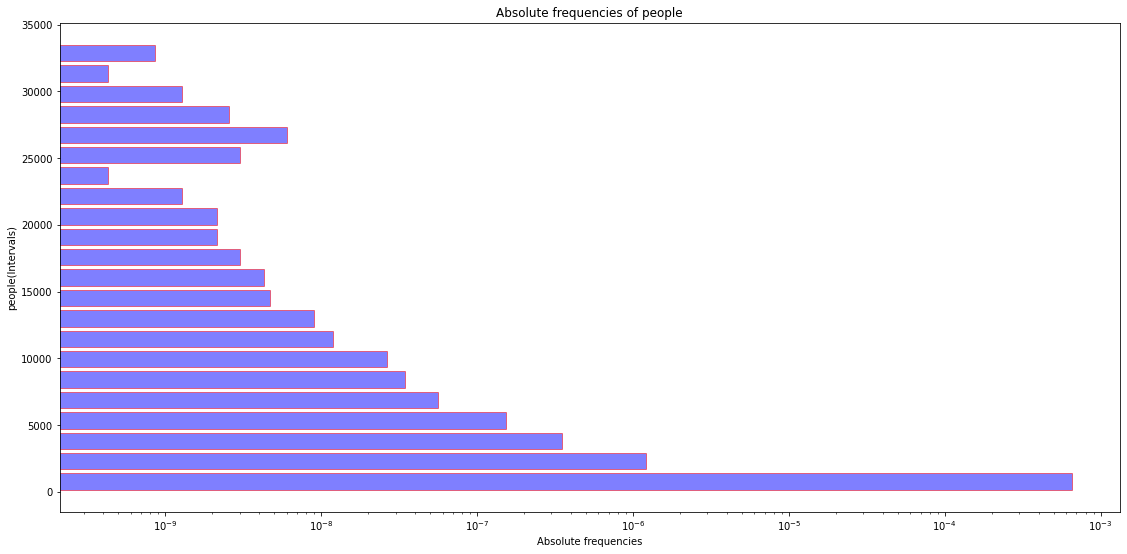

In [24]:
# we use log, to better visualize the plot

plt.figure(figsize = (19, 9))

length = len(res)
num_bins = round(1 + math.log2(length)) # Sturge rule
#print(num_bins)
plt.hist(res, num_bins, color = 'blue',
        edgecolor = 'red', density = True, 
        orientation = 'horizontal', rwidth = 0.8,
        alpha = .5, log = True)

plt.title("Absolute frequencies of people") 
plt.xlabel("Absolute frequencies")
plt.ylabel("people(Intervals)") 
plt.show()

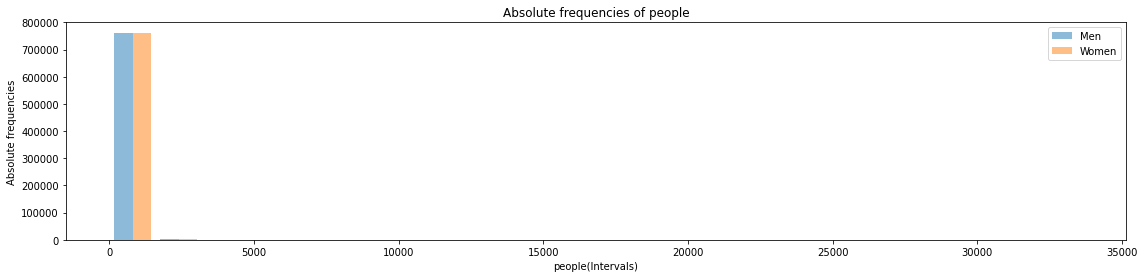

In [25]:
plt.figure(figsize = (19, 4))

length = len(res_men)
num_bins = round(1 + math.log2(length)) # Sturge rule
#print(num_bins)
plt.hist([res_men, res_women],
                num_bins, 
                label = ["Men", "Women"], alpha=0.5)
plt.legend()

plt.title("Absolute frequencies of people") 
plt.xlabel("people(Intervals)")
plt.ylabel("Absolute frequencies") ;

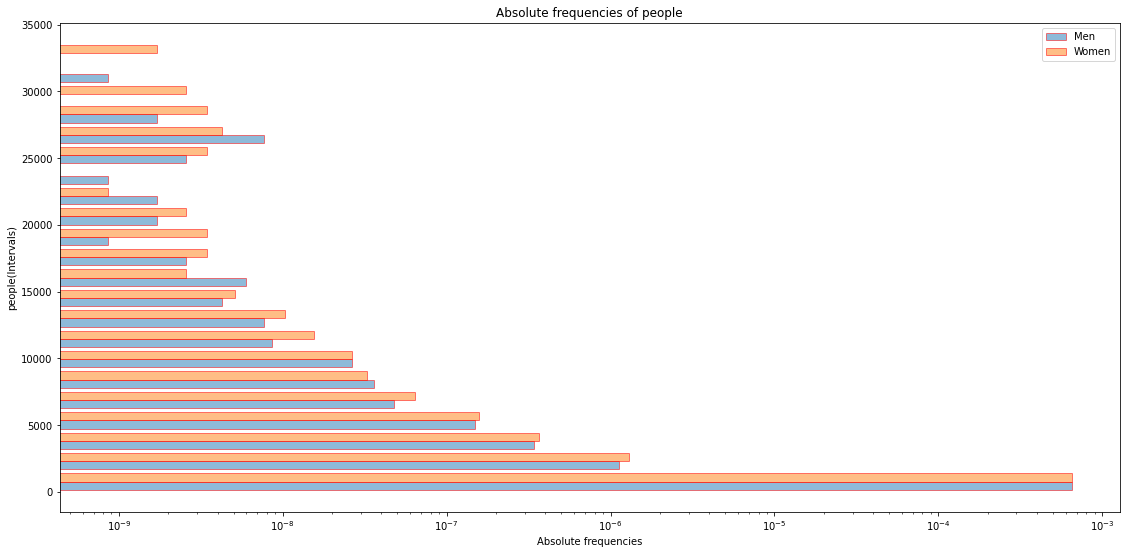

In [26]:
# we use log, to better visualize the plot
plt.figure(figsize = (19, 9))

length = len(res)
num_bins = round(1 + math.log2(length)) # Sturge rule
#print(num_bins)
plt.hist([res_men, res_women], num_bins, 
        edgecolor = 'red', density = True, 
        orientation = 'horizontal', rwidth = 0.8,
        alpha = .5, log = True, label = ["Men", "Women"])

plt.legend()

plt.title("Absolute frequencies of people") 
plt.xlabel("Absolute frequencies")
plt.ylabel("people(Intervals)") ;

# Percentage of people aged 15–24 years, for each municipality

In [63]:
res_comune = [] # % of people (all ages), by comune
pop_comune = [] # total pop by comune
slice_comune = [] # % of people aged 15-24 years, by comune

for com in range(len(dic["Men"][0])):
    A = [dic["Men"][k][com] for k in range(len(dic["Age"]))]
    B = [dic["Women"][k][com] for k in range(len(dic["Age"]))]
    total_pop = sum(A+B)
    slice_A = A[3:5] # men 15-24
    slice_B = B[3:5] # women 15-24
    sliced = sum(slice_A)+sum(slice_B) # population age: 15-24
    if total_pop !=0:
        percent = (sliced/total_pop)*100
    else:
        percent = np.nan # we can remove the row or replace nan by neg value, 
                         # or ignore the commune when visualizing
    
    pop_comune.append(total_pop) # total pop by comune
    res_comune.append(percent) # total %pop aged 15-24 years, by comune
    slice_comune.append(sliced) # total 15-24 by comune
    
res_comune[:5]

[7.1315945996965295,
 7.692307692307692,
 nan,
 13.381461033884175,
 13.360207908485581]

In [64]:
max(res_comune)

57.14285714285714

In [65]:
pop_comune[:5]

[774.254876490623, 265.349794238683, 0, 14046.22813393976, 1663.687004322038]

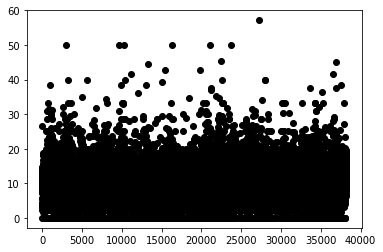

In [66]:
plt.plot(range(len(res_comune)), res_comune, 'ko')

# Mean (avg) and Standard deviation (std)

In [67]:
avg_comune = [] # mean
std_comune = [] # std

for com in range(len(dic["Men"][0])):
    A = [dic["Men"][k][com] for k in range(len(dic["Age"]))]
    B = [dic["Women"][k][com] for k in range(len(dic["Age"]))]
    slice_A = A[3:5]
    slice_B = B[3:5]
    avg = np.mean(slice_A+slice_B)
    std = (np.var(slice_A+slice_B))**0.5 # or np.sqrt
    avg_comune.append(avg)
    std_comune.append(std)

    
avg_comune[:5]

[13.804179739923077,
 5.10288065843621,
 0.0,
 469.8976361184063,
 55.568010680969934]

In [68]:
std_comune[:5]

[10.842280030741296,
 8.838448565372042,
 0.0,
 59.67812403314221,
 17.257552391668536]

# Percentage of people aged 15-24 years in France

In [69]:
avg_France = np.mean(avg_comune)
avg_France

51.31404560309668

# Largest and lowest extreme % of population aged 15-24 years

In [70]:
max(res_comune), type(res_comune)

(57.14285714285714, list)

In [71]:
w = np.asarray(res_comune)[np.logical_not(np.isnan(res_comune))] # removing NaNs, not needed if we used 
                                                                # a larger value as 555
# with NaNs, we do not need to look at the results to fix the value (555 or more than)

In [72]:
v = np.unique(w)
v

array([ 0.        ,  0.68022294,  0.72781522, ..., 45.45454545,
       50.        , 57.14285714])

In [73]:
#to get ALL the min indices 
np.where(np.array(res_comune) == min(v))[0] # or np.flatnonzero(np.array(res_comune) == min(v))
#np.argmin only gives 1 elt

array([   18,    74,   158, ..., 37977, 38041, 38054])

In [74]:
max_val = np.unique(v)[-1] # 
# [-1] using NaN, 
#[-2] with a value : the last one is 555, which corresponds to municipalities with missing values
np.where(np.array(res_comune) == max_val)[0] # or np.flatnonzero(np.array(res_comune) == max_val)

array([27263])

In [75]:
extrem_bas = np.where(np.array(res_comune) == min(v))[0]
extrem_haut = np.where(np.array(res_comune) == max_val)[0]#[0]

In [76]:
extrem_haut

array([27263])

In [77]:
extrem_bas

array([   18,    74,   158, ..., 37977, 38041, 38054])

## Largest extreme %

In [100]:
print(" ==============  Largest extreme value  =============== ")
    
com = extrem_haut[0]
#leur nom, code insee, pourcentage 15/24, population

comune_name = sheet.col_slice(colx = 5, start_rowx=14+com, end_rowx=14+com+1)
comune_code_insee_DR = sheet.col_slice(colx = 1, start_rowx=14+com, end_rowx=14+com+1)
comune_code_insee_CR = sheet.col_slice(colx = 2, start_rowx=14+com, end_rowx=14+com+1)

comune_code_insee = comune_code_insee_DR[0].value + comune_code_insee_CR[0].value
print("---> Comune Name    :", comune_name[0].value, "\n")

print("---> Comune Code INSEE   :", comune_code_insee, "\n")

print("---> '%' of people aged 15-24 years by comune   :", round(res_comune[com], 2), " %", "\n")
# or res_comune[com]

print("--->  Comune Population 'all ages'   :", pop_comune[com], "\n")

print("--->  Comune Population, people aged 15-24 years   :", slice_comune[com], "\n")

print(" ==============  Largest extreme value  (END) =============== ")


 ==============  Largest extreme value  =============== 
---> Comune Name    : Roche-Charles-La-Mayrand 

---> Comune Code INSEE   : 63303 

---> '%' of people aged 15-24 years by comune   : 57.14  % 

--->  Comune Population 'all ages'   : 33.333333333333314 

--->  Comune Population, people aged 15-24 years   : 19.047619047619037 

 ==============  Largest extreme value  (END) =============== 


## Lowest extreme %

In [103]:
print(" ==============  Lowest extreme value  =============== ")
    
for com in list(extrem_bas):
    comune_name = sheet.col_slice(colx = 5, start_rowx=14+com, end_rowx=14+com+1)
    comune_code_insee_DR = sheet.col_slice(colx = 1, start_rowx=14+com, end_rowx=14+com+1)
    comune_code_insee_CR = sheet.col_slice(colx = 2, start_rowx=14+com, end_rowx=14+com+1)

    comune_code_insee = comune_code_insee_DR[0].value + comune_code_insee_CR[0].value
    print("---> Comune Name    :", comune_name[0].value, "\n")

    print("---> Comune Code INSEE   :", comune_code_insee, "\n")

    print("---> '%' of people aged 15-24 years by comune   :", round(res_comune[com], 2), " %", "\n")
    # or res_comune[com]

    print("--->  Comune Population 'all ages'   :", pop_comune[com], "\n")

    print("--->  Comune Population, people aged 15-24 years   :", slice_comune[com], "\n")

print(" ==============  Lowest extreme value  (END) =============== ")


 ==============  Lowest extreme value  =============== 
---> Comune Name    : Armix 

---> Comune Code INSEE   : 01019 

---> '%' of people aged 15-24 years by comune   : 0.0  % 

--->  Comune Population 'all ages'   : 40.83333333333331 

--->  Comune Population, people aged 15-24 years   : 0 

---> Comune Name    : Chaley 

---> Comune Code INSEE   : 01076 

---> '%' of people aged 15-24 years by comune   : 0.0  % 

--->  Comune Population 'all ages'   : 140.0 

--->  Comune Population, people aged 15-24 years   : 0 

---> Comune Name    : Flaxieu 

---> Comune Code INSEE   : 01162 

---> '%' of people aged 15-24 years by comune   : 0.0  % 

--->  Comune Population 'all ages'   : 57.53846153846152 

--->  Comune Population, people aged 15-24 years   : 0 

---> Comune Name    : Lavours 

---> Comune Code INSEE   : 01208 

---> '%' of people aged 15-24 years by comune   : 0.0  % 

--->  Comune Population 'all ages'   : 129.76744186046517 

--->  Comune Population, people aged 15-24 year


--->  Comune Population 'all ages'   : 53.28125 

--->  Comune Population, people aged 15-24 years   : 0 

---> Comune Name    : Moydans 

---> Comune Code INSEE   : 05091 

---> '%' of people aged 15-24 years by comune   : 0.0  % 

--->  Comune Population 'all ages'   : 42.05441105627931 

--->  Comune Population, people aged 15-24 years   : 0 

---> Comune Name    : Sainte-Colombe 

---> Comune Code INSEE   : 05135 

---> '%' of people aged 15-24 years by comune   : 0.0  % 

--->  Comune Population 'all ages'   : 44.196428571428605 

--->  Comune Population, people aged 15-24 years   : 0 

---> Comune Name    : Saint-Maurice-En-Valgodemard 

---> Comune Code INSEE   : 05152 

---> '%' of people aged 15-24 years by comune   : 0.0  % 

--->  Comune Population 'all ages'   : 142.23999999999998 

--->  Comune Population, people aged 15-24 years   : 0 

---> Comune Name    : Saint-Pierre-Avez 

---> Comune Code INSEE   : 05155 

---> '%' of people aged 15-24 years by comune   : 0.0  % 



---> Comune Code INSEE   : 09193 

---> '%' of people aged 15-24 years by comune   : 0.0  % 

--->  Comune Population 'all ages'   : 58.032786885245876 

--->  Comune Population, people aged 15-24 years   : 0 

---> Comune Name    : Monesple 

---> Comune Code INSEE   : 09195 

---> '%' of people aged 15-24 years by comune   : 0.0  % 

--->  Comune Population 'all ages'   : 25.96153846153845 

--->  Comune Population, people aged 15-24 years   : 0 

---> Comune Name    : Montagagne 

---> Comune Code INSEE   : 09196 

---> '%' of people aged 15-24 years by comune   : 0.0  % 

--->  Comune Population 'all ages'   : 76.00000000000001 

--->  Comune Population, people aged 15-24 years   : 0 

---> Comune Name    : Montaillou 

---> Comune Code INSEE   : 09197 

---> '%' of people aged 15-24 years by comune   : 0.0  % 

--->  Comune Population 'all ages'   : 15.0 

--->  Comune Population, people aged 15-24 years   : 0 

---> Comune Name    : Montbel 

---> Comune Code INSEE   : 09200 

--

---> Comune Code INSEE   : 12303 

---> '%' of people aged 15-24 years by comune   : 0.0  % 

--->  Comune Population 'all ages'   : 243.00813008130052 

--->  Comune Population, people aged 15-24 years   : 0 

---> Comune Name    : Barou-En-Auge 

---> Comune Code INSEE   : 14043 

---> '%' of people aged 15-24 years by comune   : 0.0  % 

--->  Comune Population 'all ages'   : 83.57142857142856 

--->  Comune Population, people aged 15-24 years   : 0 

---> Comune Name    : Bonnœil 

---> Comune Code INSEE   : 14087 

---> '%' of people aged 15-24 years by comune   : 0.0  % 

--->  Comune Population 'all ages'   : 145.55555555555554 

--->  Comune Population, people aged 15-24 years   : 0 

---> Comune Name    : Bourgeauville 

---> Comune Code INSEE   : 14091 

---> '%' of people aged 15-24 years by comune   : 0.0  % 

--->  Comune Population 'all ages'   : 117.19047619047633 

--->  Comune Population, people aged 15-24 years   : 0 

---> Comune Name    : Grangues 

---> Comune Code

---> '%' of people aged 15-24 years by comune   : 0.0  % 

--->  Comune Population 'all ages'   : 95.0 

--->  Comune Population, people aged 15-24 years   : 0 

---> Comune Name    : Saint-Julien-Maumont 

---> Comune Code INSEE   : 19217 

---> '%' of people aged 15-24 years by comune   : 0.0  % 

--->  Comune Population 'all ages'   : 160.0 

--->  Comune Population, people aged 15-24 years   : 0 

---> Comune Name    : Sainte-Marie-Lapanouze 

---> Comune Code INSEE   : 19219 

---> '%' of people aged 15-24 years by comune   : 0.0  % 

--->  Comune Population 'all ages'   : 48.27272727272724 

--->  Comune Population, people aged 15-24 years   : 0 

---> Comune Name    : Saint-Pardoux-Le-Neuf 

---> Comune Code INSEE   : 19232 

---> '%' of people aged 15-24 years by comune   : 0.0  % 

--->  Comune Population 'all ages'   : 85.0 

--->  Comune Population, people aged 15-24 years   : 0 

---> Comune Name    : Ségur-Le-Château 

---> Comune Code INSEE   : 19254 

---> '%' of people 

---> '%' of people aged 15-24 years by comune   : 0.0  % 

--->  Comune Population 'all ages'   : 188.03108808290162 

--->  Comune Population, people aged 15-24 years   : 0 

---> Comune Name    : Saint-Pierre-Le-Bost 

---> Comune Code INSEE   : 23233 

---> '%' of people aged 15-24 years by comune   : 0.0  % 

--->  Comune Population 'all ages'   : 118.16793893129756 

--->  Comune Population, people aged 15-24 years   : 0 

---> Comune Name    : Saint-Priest 

---> Comune Code INSEE   : 23234 

---> '%' of people aged 15-24 years by comune   : 0.0  % 

--->  Comune Population 'all ages'   : 154.6875 

--->  Comune Population, people aged 15-24 years   : 0 

---> Comune Name    : Saint-Priest-Palus 

---> Comune Code INSEE   : 23237 

---> '%' of people aged 15-24 years by comune   : 0.0  % 

--->  Comune Population 'all ages'   : 60.0 

--->  Comune Population, people aged 15-24 years   : 0 

---> Comune Name    : Trois-Fonds 

---> Comune Code INSEE   : 23255 

---> '%' of people 

---> '%' of people aged 15-24 years by comune   : 0.0  % 

--->  Comune Population 'all ages'   : 40.0 

--->  Comune Population, people aged 15-24 years   : 0 

---> Comune Name    : Rochebrune 

---> Comune Code INSEE   : 26269 

---> '%' of people aged 15-24 years by comune   : 0.0  % 

--->  Comune Population 'all ages'   : 49.01785714285713 

--->  Comune Population, people aged 15-24 years   : 0 

---> Comune Name    : Rottier 

---> Comune Code INSEE   : 26283 

---> '%' of people aged 15-24 years by comune   : 0.0  % 

--->  Comune Population 'all ages'   : 14.31818181818181 

--->  Comune Population, people aged 15-24 years   : 0 

---> Comune Name    : Saint-Benoit-En-Diois 

---> Comune Code INSEE   : 26296 

---> '%' of people aged 15-24 years by comune   : 0.0  % 

--->  Comune Population 'all ages'   : 26.12903225806452 

--->  Comune Population, people aged 15-24 years   : 0 

---> Comune Name    : Saint-Julien-En-Quint 

---> Comune Code INSEE   : 26308 

---> '%' of pe

---> Comune Code INSEE   : 31564 

---> '%' of people aged 15-24 years by comune   : 0.0  % 

--->  Comune Population 'all ages'   : 143.99305555555563 

--->  Comune Population, people aged 15-24 years   : 0 

---> Comune Name    : Antras 

---> Comune Code INSEE   : 32003 

---> '%' of people aged 15-24 years by comune   : 0.0  % 

--->  Comune Population 'all ages'   : 39.166666666666636 

--->  Comune Population, people aged 15-24 years   : 0 

---> Comune Name    : Armentieux 

---> Comune Code INSEE   : 32008 

---> '%' of people aged 15-24 years by comune   : 0.0  % 

--->  Comune Population 'all ages'   : 87.29729729729739 

--->  Comune Population, people aged 15-24 years   : 0 

---> Comune Name    : Ayguetinte 

---> Comune Code INSEE   : 32024 

---> '%' of people aged 15-24 years by comune   : 0.0  % 

--->  Comune Population 'all ages'   : 149.0740740740742 

--->  Comune Population, people aged 15-24 years   : 0 

---> Comune Name    : Bars 

---> Comune Code INSEE   : 3

---> Comune Code INSEE   : 39062 

---> '%' of people aged 15-24 years by comune   : 0.0  % 

--->  Comune Population 'all ages'   : 59.13043478260873 

--->  Comune Population, people aged 15-24 years   : 0 

---> Comune Name    : Bouchoux 

---> Comune Code INSEE   : 39068 

---> '%' of people aged 15-24 years by comune   : 0.0  % 

--->  Comune Population 'all ages'   : 333.4463245479015 

--->  Comune Population, people aged 15-24 years   : 0 

---> Comune Name    : Broissia 

---> Comune Code INSEE   : 39080 

---> '%' of people aged 15-24 years by comune   : 0.0  % 

--->  Comune Population 'all ages'   : 75.0 

--->  Comune Population, people aged 15-24 years   : 0 

---> Comune Name    : Chassagne 

---> Comune Code INSEE   : 39112 

---> '%' of people aged 15-24 years by comune   : 0.0  % 

--->  Comune Population 'all ages'   : 118.99999999999997 

--->  Comune Population, people aged 15-24 years   : 0 

---> Comune Name    : Châtel-De-Joux 

---> Comune Code INSEE   : 39118 

--->  Comune Population, people aged 15-24 years   : 0 

---> Comune Name    : Bouyssou 

---> Comune Code INSEE   : 46036 

---> '%' of people aged 15-24 years by comune   : 0.0  % 

--->  Comune Population 'all ages'   : 132.38095238095252 

--->  Comune Population, people aged 15-24 years   : 0 

---> Comune Name    : Cadrieu 

---> Comune Code INSEE   : 46041 

---> '%' of people aged 15-24 years by comune   : 0.0  % 

--->  Comune Population 'all ages'   : 145.0 

--->  Comune Population, people aged 15-24 years   : 0 

---> Comune Name    : Concorès 

---> Comune Code INSEE   : 46072 

---> '%' of people aged 15-24 years by comune   : 0.0  % 

--->  Comune Population 'all ages'   : 307.8688524590166 

--->  Comune Population, people aged 15-24 years   : 0 

---> Comune Name    : Cras 

---> Comune Code INSEE   : 46079 

---> '%' of people aged 15-24 years by comune   : 0.0  % 

--->  Comune Population 'all ages'   : 105.0 

--->  Comune Population, people aged 15-24 years   : 0 


---> Comune Code INSEE   : 52108 

---> '%' of people aged 15-24 years by comune   : 0.0  % 

--->  Comune Population 'all ages'   : 140.0 

--->  Comune Population, people aged 15-24 years   : 0 

---> Comune Name    : Charmes-En-L'angle 

---> Comune Code INSEE   : 52109 

---> '%' of people aged 15-24 years by comune   : 0.0  % 

--->  Comune Population 'all ages'   : 10.0 

--->  Comune Population, people aged 15-24 years   : 0 

---> Comune Name    : Chézeaux 

---> Comune Code INSEE   : 52124 

---> '%' of people aged 15-24 years by comune   : 0.0  % 

--->  Comune Population 'all ages'   : 71.0526315789474 

--->  Comune Population, people aged 15-24 years   : 0 

---> Comune Name    : Choilley-Dardenay 

---> Comune Code INSEE   : 52126 

---> '%' of people aged 15-24 years by comune   : 0.0  % 

--->  Comune Population 'all ages'   : 155.96273291925468 

--->  Comune Population, people aged 15-24 years   : 0 

---> Comune Name    : Coiffy-Le-Bas 

---> Comune Code INSEE   : 52

---> '%' of people aged 15-24 years by comune   : 0.0  % 

--->  Comune Population 'all ages'   : 68.62745098039223 

--->  Comune Population, people aged 15-24 years   : 0 

---> Comune Name    : Villers-En-Haye 

---> Comune Code INSEE   : 54573 

---> '%' of people aged 15-24 years by comune   : 0.0  % 

--->  Comune Population 'all ages'   : 158.232044198895 

--->  Comune Population, people aged 15-24 years   : 0 

---> Comune Name    : Amanty 

---> Comune Code INSEE   : 55005 

---> '%' of people aged 15-24 years by comune   : 0.0  % 

--->  Comune Population 'all ages'   : 27.7777777777778 

--->  Comune Population, people aged 15-24 years   : 0 

---> Comune Name    : Autréville-Saint-Lambert 

---> Comune Code INSEE   : 55018 

---> '%' of people aged 15-24 years by comune   : 0.0  % 

--->  Comune Population 'all ages'   : 40.0 

--->  Comune Population, people aged 15-24 years   : 0 

---> Comune Name    : Baudrémont 

---> Comune Code INSEE   : 55032 

---> '%' of people a

---> '%' of people aged 15-24 years by comune   : 0.0  % 

--->  Comune Population 'all ages'   : 65.0 

--->  Comune Population, people aged 15-24 years   : 0 

---> Comune Name    : Fâchin 

---> Comune Code INSEE   : 58111 

---> '%' of people aged 15-24 years by comune   : 0.0  % 

--->  Comune Population 'all ages'   : 117.85714285714296 

--->  Comune Population, people aged 15-24 years   : 0 

---> Comune Name    : Fléty 

---> Comune Code INSEE   : 58114 

---> '%' of people aged 15-24 years by comune   : 0.0  % 

--->  Comune Population 'all ages'   : 99.6774193548387 

--->  Comune Population, people aged 15-24 years   : 0 

---> Comune Name    : Frasnay-Reugny 

---> Comune Code INSEE   : 58119 

---> '%' of people aged 15-24 years by comune   : 0.0  % 

--->  Comune Population 'all ages'   : 78.5714285714286 

--->  Comune Population, people aged 15-24 years   : 0 

---> Comune Name    : Gien-Sur-Cure 

---> Comune Code INSEE   : 58125 

---> '%' of people aged 15-24 years 

---> '%' of people aged 15-24 years by comune   : 0.0  % 

--->  Comune Population 'all ages'   : 137.82945736434115 

--->  Comune Population, people aged 15-24 years   : 0 

---> Comune Name    : Vergheas 

---> Comune Code INSEE   : 63447 

---> '%' of people aged 15-24 years by comune   : 0.0  % 

--->  Comune Population 'all ages'   : 62.96875 

--->  Comune Population, people aged 15-24 years   : 0 

---> Comune Name    : Ainhice-Mongelos 

---> Comune Code INSEE   : 64013 

---> '%' of people aged 15-24 years by comune   : 0.0  % 

--->  Comune Population 'all ages'   : 162.82352941176484 

--->  Comune Population, people aged 15-24 years   : 0 

---> Comune Name    : Aldudes 

---> Comune Code INSEE   : 64016 

---> '%' of people aged 15-24 years by comune   : 0.0  % 

--->  Comune Population 'all ages'   : 315.10703363914365 

--->  Comune Population, people aged 15-24 years   : 0 

---> Comune Name    : Arrast-Larrebieu 

---> Comune Code INSEE   : 64050 

---> '%' of people 

---> '%' of people aged 15-24 years by comune   : 0.0  % 

--->  Comune Population 'all ages'   : 60.0 

--->  Comune Population, people aged 15-24 years   : 0 

---> Comune Name    : Sansa 

---> Comune Code INSEE   : 66191 

---> '%' of people aged 15-24 years by comune   : 0.0  % 

--->  Comune Population 'all ages'   : 18.333333333333318 

--->  Comune Population, people aged 15-24 years   : 0 

---> Comune Name    : Serralongue 

---> Comune Code INSEE   : 66194 

---> '%' of people aged 15-24 years by comune   : 0.0  % 

--->  Comune Population 'all ages'   : 245.6799693463938 

--->  Comune Population, people aged 15-24 years   : 0 

---> Comune Name    : Souanyas 

---> Comune Code INSEE   : 66197 

---> '%' of people aged 15-24 years by comune   : 0.0  % 

--->  Comune Population 'all ages'   : 40.0 

--->  Comune Population, people aged 15-24 years   : 0 

---> Comune Name    : Tarerach 

---> Comune Code INSEE   : 66201 

---> '%' of people aged 15-24 years by comune   : 0.0

---> Comune Code INSEE   : 71363 

---> '%' of people aged 15-24 years by comune   : 0.0  % 

--->  Comune Population 'all ages'   : 102.1052631578948 

--->  Comune Population, people aged 15-24 years   : 0 

---> Comune Name    : Saint-Huruge 

---> Comune Code INSEE   : 71427 

---> '%' of people aged 15-24 years by comune   : 0.0  % 

--->  Comune Population 'all ages'   : 60.0 

--->  Comune Population, people aged 15-24 years   : 0 

---> Comune Name    : Saint-Martin-D'auxy 

---> Comune Code INSEE   : 71449 

---> '%' of people aged 15-24 years by comune   : 0.0  % 

--->  Comune Population 'all ages'   : 98.77118644067787 

--->  Comune Population, people aged 15-24 years   : 0 

---> Comune Name    : Saint-Martin-De-Commune 

---> Comune Code INSEE   : 71450 

---> '%' of people aged 15-24 years by comune   : 0.0  % 

--->  Comune Population 'all ages'   : 110.81818181818184 

--->  Comune Population, people aged 15-24 years   : 0 

---> Comune Name    : Saint-Martin-La-Patro

---> '%' of people aged 15-24 years by comune   : 0.0  % 

--->  Comune Population 'all ages'   : 49.05660377358491 

--->  Comune Population, people aged 15-24 years   : 0 

---> Comune Name    : Féneyrols 

---> Comune Code INSEE   : 82061 

---> '%' of people aged 15-24 years by comune   : 0.0  % 

--->  Comune Population 'all ages'   : 135.0 

--->  Comune Population, people aged 15-24 years   : 0 

---> Comune Name    : Gramont 

---> Comune Code INSEE   : 82074 

---> '%' of people aged 15-24 years by comune   : 0.0  % 

--->  Comune Population 'all ages'   : 132.51879699248124 

--->  Comune Population, people aged 15-24 years   : 0 

---> Comune Name    : Labastide-De-Penne 

---> Comune Code INSEE   : 82078 

---> '%' of people aged 15-24 years by comune   : 0.0  % 

--->  Comune Population 'all ages'   : 115.0 

--->  Comune Population, people aged 15-24 years   : 0 

---> Comune Name    : Lachapelle 

---> Comune Code INSEE   : 82083 

---> '%' of people aged 15-24 years by 

---> '%' of people aged 15-24 years by comune   : 0.0  % 

--->  Comune Population 'all ages'   : 88.04347826086963 

--->  Comune Population, people aged 15-24 years   : 0 

---> Comune Name    : Sennevoy-Le-Bas 

---> Comune Code INSEE   : 89385 

---> '%' of people aged 15-24 years by comune   : 0.0  % 

--->  Comune Population 'all ages'   : 72.59740259740254 

--->  Comune Population, people aged 15-24 years   : 0 

---> Comune Name    : Sennevoy-Le-Haut 

---> Comune Code INSEE   : 89386 

---> '%' of people aged 15-24 years by comune   : 0.0  % 

--->  Comune Population 'all ages'   : 113.8596491228071 

--->  Comune Population, people aged 15-24 years   : 0 

---> Comune Name    : Talcy 

---> Comune Code INSEE   : 89406 

---> '%' of people aged 15-24 years by comune   : 0.0  % 

--->  Comune Population 'all ages'   : 73.99999999999994 

--->  Comune Population, people aged 15-24 years   : 0 

---> Comune Name    : Tharoiseau 

---> Comune Code INSEE   : 89409 

---> '%' of pe

In [113]:
dict_1 = {}

for com in list(extrem_bas):
    comune_name = sheet.col_slice(colx = 5, start_rowx=14+com, end_rowx=14+com+1)
    comune_code_insee_DR = sheet.col_slice(colx = 1, start_rowx=14+com, end_rowx=14+com+1)
    comune_code_insee_CR = sheet.col_slice(colx = 2, start_rowx=14+com, end_rowx=14+com+1)
    comune_code_insee = comune_code_insee_DR[0].value + comune_code_insee_CR[0].value
  
    dict_1[comune_name[0].value] = {}
    
    dict_1[comune_name[0].value]["comune_code_insee"] = comune_code_insee
    dict_1[comune_name[0].value]["'%' of people aged 15-24 years"] = round(res_comune[com], 2)
    dict_1[comune_name[0].value]["Comune Population 'all ages'"] = pop_comune[com]
    dict_1[comune_name[0].value]["Comune Population, people aged 15-24 years"] = slice_comune[com]
    
    
    
dict_1

{'Armix': {'comune_code_insee': '01019',
  "'%' of people aged 15-24 years": 0.0,
  "Comune Population 'all ages'": 40.83333333333331,
  'Comune Population, people aged 15-24 years': 0},
 'Chaley': {'comune_code_insee': '01076',
  "'%' of people aged 15-24 years": 0.0,
  "Comune Population 'all ages'": 140.0,
  'Comune Population, people aged 15-24 years': 0},
 'Flaxieu': {'comune_code_insee': '01162',
  "'%' of people aged 15-24 years": 0.0,
  "Comune Population 'all ages'": 57.53846153846152,
  'Comune Population, people aged 15-24 years': 0},
 'Lavours': {'comune_code_insee': '01208',
  "'%' of people aged 15-24 years": 0.0,
  "Comune Population 'all ages'": 129.76744186046517,
  'Comune Population, people aged 15-24 years': 0},
 'Nivollet-Montgriffon': {'comune_code_insee': '01277',
  "'%' of people aged 15-24 years": 0.0,
  "Comune Population 'all ages'": 105.0,
  'Comune Population, people aged 15-24 years': 0},
 'Oncieu': {'comune_code_insee': '01279',
  "'%' of people aged 15-2

In [121]:
list(dict_1.keys())[0]

'Armix'

In [122]:
dict_1[list(dict_1.keys())[0]]

{'comune_code_insee': '01019',
 "'%' of people aged 15-24 years": 0.0,
 "Comune Population 'all ages'": 40.83333333333331,
 'Comune Population, people aged 15-24 years': 0}

In [ ]:
# END 